In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import calendar

In [8]:
df = pd.read_csv('Electric Vehicle Sales by State in India.csv')

In [9]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [10]:
df.shape

(96845, 8)

In [11]:
df.sample(8)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
5718,2021.0,jan,1/1/2021,Chhattisgarh,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,0.0
88510,2023.0,nov,11/1/2023,Assam,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,555.0
61874,2020.0,aug,8/1/2020,Manipur,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0
329,2014.0,jan,1/1/2014,Kerala,HEARSES,Others,Others,0.0
31862,2022.0,apr,4/1/2022,Haryana,CAMPER VAN / TRAILER,Others,Others,0.0
65737,2015.0,sep,9/1/2015,Kerala,VEHICLE FITTED WITH COMPRESSOR,Others,Others,0.0
75033,2017.0,oct,10/1/2017,Bihar,PRIVATE SERVICE VEHICLE (INDIVIDUAL USE),Others,Others,0.0
44314,2018.0,jun,6/1/2018,Jharkhand,AUXILIARY TRAILER,Others,Others,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [13]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [14]:
df.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  float64       
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.9+ MB


In [18]:
df['Year'] = df['Year'].astype(int)

In [19]:
cat_cols = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
for col in cat_cols:
    df[col]= df[col].str.strip().str.title()

In [20]:
for col in cat_cols:
    print(f"\nValue counts in '{col}':")
    print(df[col].value_counts())


Value counts in 'Month_Name':
Month_Name
Jan    8853
Mar    8435
Nov    8078
Dec    8076
Feb    8072
Sep    8044
Oct    8017
Jul    7983
Apr    7917
Aug    7896
Jun    7852
May    7622
Name: count, dtype: int64

Value counts in 'State':
State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu And Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
Dnh And Dd                  19

In [21]:
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,Jan,2014-01-01,Andhra Pradesh,Adapted Vehicle,Others,Others,0.0
1,2014,Jan,2014-01-01,Andhra Pradesh,Agricultural Tractor,Others,Others,0.0
2,2014,Jan,2014-01-01,Andhra Pradesh,Ambulance,Others,Others,0.0
3,2014,Jan,2014-01-01,Andhra Pradesh,Articulated Vehicle,Others,Others,0.0
4,2014,Jan,2014-01-01,Andhra Pradesh,Bus,Bus,Bus,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 5.9+ MB


In [23]:
#  Standardize month order
month_map = {
    'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April',
    'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August',
    'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'
}
df['Month_Name'] = df['Month_Name'].map(month_map)
df['Month_Name'] = pd.Categorical(df['Month_Name'], 
                                   categories=[
                                       'January', 'February', 'March', 'April', 'May', 'June',
                                       'July', 'August', 'September', 'October', 'November', 'December'
                                   ],
                                   ordered=True)


In [24]:
vc_counts = df['Vehicle_Class'].value_counts()
vc_counts[vc_counts < 100]

Vehicle_Class
Quadricycle (Private)               94
Library Van                         93
Power Tiller                        81
Auxiliary Trailer                   81
Armoured/Specialised Vehicle        72
Power Tiller (Commercial)           61
Bulldozer                           34
Tree Trimming Vehicle               34
Snorked Ladders                     30
Semi-Trailer (Commercial)           18
X-Ray Van                           12
Motor Cycle/Scooter-With Trailer     9
Modular Hydraulic Trailer            3
Motor Caravan                        3
Name: count, dtype: int64

In [25]:
df = df.copy()  
vehicle_class_count = df['Vehicle_Class'].value_counts()
rare_classes = vehicle_class_count[vehicle_class_count < 100].index
df['Vehicle_Class_Grouped'] = df['Vehicle_Class'].replace(rare_classes, 'Other')


In [26]:
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Vehicle_Class_Grouped
0,2014,January,2014-01-01,Andhra Pradesh,Adapted Vehicle,Others,Others,0.0,Adapted Vehicle
1,2014,January,2014-01-01,Andhra Pradesh,Agricultural Tractor,Others,Others,0.0,Agricultural Tractor
2,2014,January,2014-01-01,Andhra Pradesh,Ambulance,Others,Others,0.0,Ambulance
3,2014,January,2014-01-01,Andhra Pradesh,Articulated Vehicle,Others,Others,0.0,Articulated Vehicle
4,2014,January,2014-01-01,Andhra Pradesh,Bus,Bus,Bus,0.0,Bus


In [27]:
df['Vehicle_Class'].unique()

array(['Adapted Vehicle', 'Agricultural Tractor', 'Ambulance',
       'Articulated Vehicle', 'Bus', 'Cash Van', 'Crane Mounted Vehicle',
       'Educational Institution Bus', 'Excavator (Commercial)',
       'Fork Lift', 'Goods Carrier', 'Harvester', 'Maxi Cab',
       'M-Cycle/Scooter', 'Motor Cab', 'Motor Car', 'Omni Bus',
       'Private Service Vehicle', 'Recovery Vehicle',
       'Three Wheeler (Passenger)', 'Tractor (Commercial)',
       'Trailer (Agricultural)', 'Trailer (Commercial)',
       'Trailer For Personal Use', 'Vehicle Fitted With Rig',
       'Camper Van / Trailer',
       'Construction Equipment Vehicle (Commercial)', 'Dumper',
       'Excavator (Nt)', 'Moped', 'Three Wheeler (Personal)',
       'Three Wheeler (Goods)', 'Earth Moving Equipment',
       'Motor Cycle/Scooter-Used For Hire',
       'Construction Equipment Vehicle', 'M-Cycle/Scooter-With Side Car',
       'Mobile Workshop', 'Omni Bus (Private Use)',
       'Vehicle Fitted With Compressor',
       'Camper

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   96845 non-null  int64         
 1   Month_Name             96845 non-null  category      
 2   Date                   96845 non-null  datetime64[ns]
 3   State                  96845 non-null  object        
 4   Vehicle_Class          96845 non-null  object        
 5   Vehicle_Category       96845 non-null  object        
 6   Vehicle_Type           96845 non-null  object        
 7   EV_Sales_Quantity      96845 non-null  float64       
 8   Vehicle_Class_Grouped  96845 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.0+ MB


EDA


C:\Users\MKProjects\AppData\Local\Temp\ipykernel_19580\3127577777.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = df.groupby(['Year', 'Month_Name'], sort=False)['EV_Sales_Quantity'].sum().reset_index()


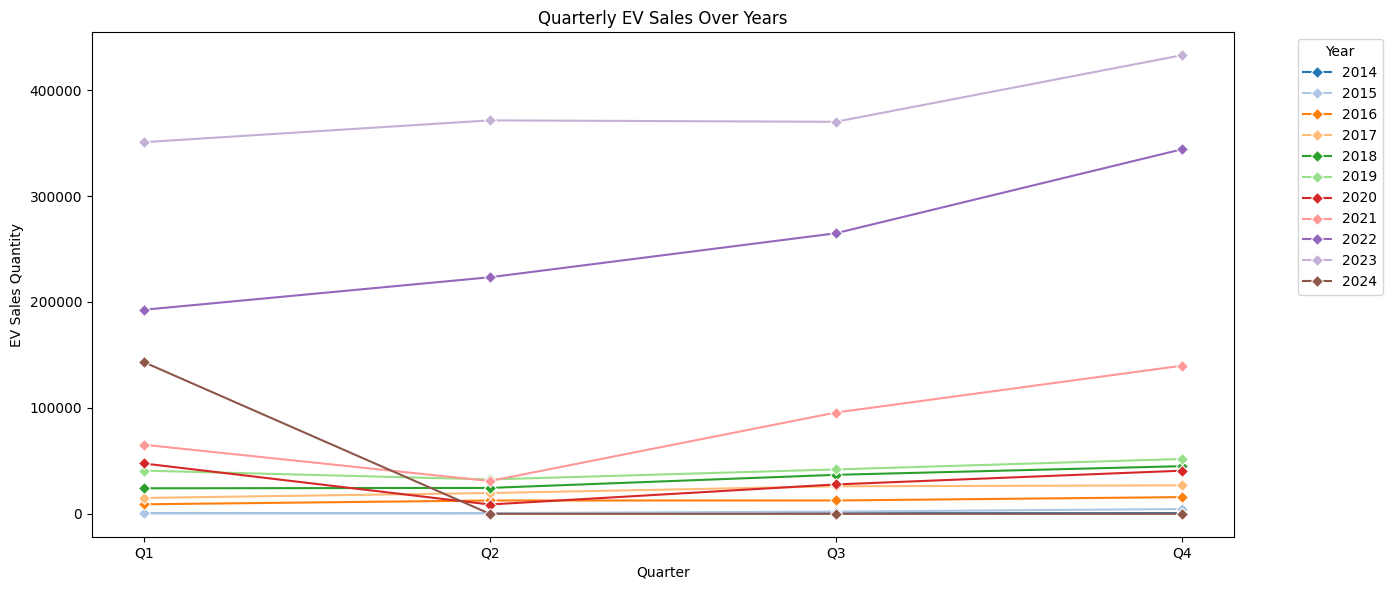

In [72]:
# Step 1: Create monthly trend data from main DataFrame
monthly_trend = df.groupby(['Year', 'Month_Name'], sort=False)['EV_Sales_Quantity'].sum().reset_index()

# Step 2: Convert full month names to their 3-letter abbreviations
month_abbr_map = {month: month[:3] for month in calendar.month_name if month}
monthly_trend['Month_Abbr'] = monthly_trend['Month_Name'].map(month_abbr_map)

# Step 3: Extract Quarter from Month Abbreviation
monthly_trend['Quarter'] = pd.to_datetime(
    monthly_trend['Month_Abbr'], format='%b'
).dt.quarter

# Step 4: Group by Year and Quarter to get total EV sales
quarterly_trend = monthly_trend.groupby(['Year', 'Quarter'])['EV_Sales_Quantity'].sum().reset_index()

# Step 5: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=quarterly_trend,
    x='Quarter',
    y='EV_Sales_Quantity',
    hue='Year',
    marker='D',
    palette='tab20'
)

plt.title('Quarterly EV Sales Over Years')
plt.xlabel('Quarter')
plt.ylabel('EV Sales Quantity')
plt.xticks([1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


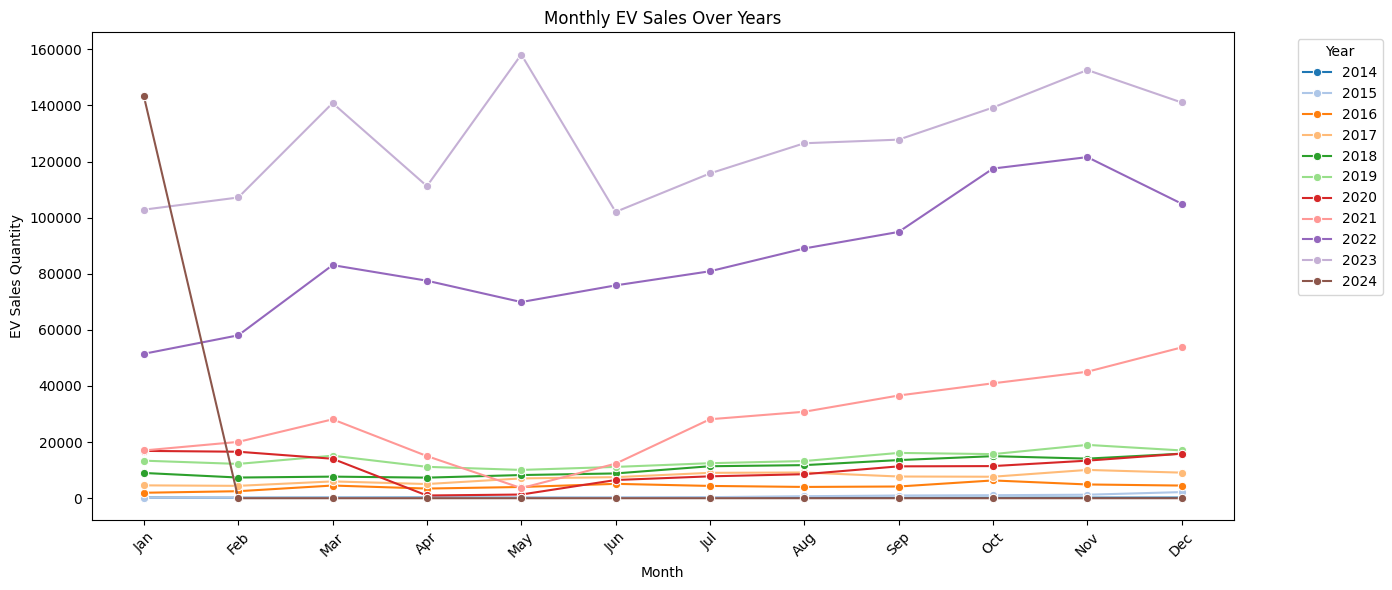

In [74]:
# Convert full month names to 3-letter format if needed
month_abbr_map = {month: month[:3] for month in calendar.month_name if month}
monthly_trend['Month_Abbr'] = monthly_trend['Month_Name'].map(month_abbr_map)

# Set month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Apply categorical order
monthly_trend['Month_Abbr'] = pd.Categorical(monthly_trend['Month_Abbr'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values(['Year', 'Month_Abbr'])

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_trend,
    x='Month_Abbr',
    y='EV_Sales_Quantity',
    hue='Year',
    marker='o',
    palette='tab20'
)
plt.title('Monthly EV Sales Over Years')
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#### Observation 
 * There is constant growth from year 2014 to 2019
 * There is drop in constant growth from march 2020 and regaind the growth in may 2020
 * 2021 is giving same curve , showing drop from march to may and then again growing , the cure is same as 2020 but with more number of sales
 * 2022 and 2023 is showing the best growth simuntaniously 2023 have more sales but with more up and downs 
 * there is no sales records after jan 2024 #

In [76]:
monthly_after_2023 = monthly_trend[monthly_trend['Year'] > 2023]

In [78]:
monthly_after_2023

,Year,Month_Name,EV_Sales_Quantity,Month_Abbr,Quarter
120,2024,January,143182.0,Jan,1
121,2024,February,0.0,Feb,1
122,2024,March,0.0,Mar,1
123,2024,April,0.0,Apr,2
124,2024,May,0.0,May,2
125,2024,June,0.0,Jun,2
126,2024,July,0.0,Jul,3
127,2024,August,0.0,Aug,3
128,2024,September,0.0,Sep,3
129,2024,October,0.0,Oct,4


State wise EV sales

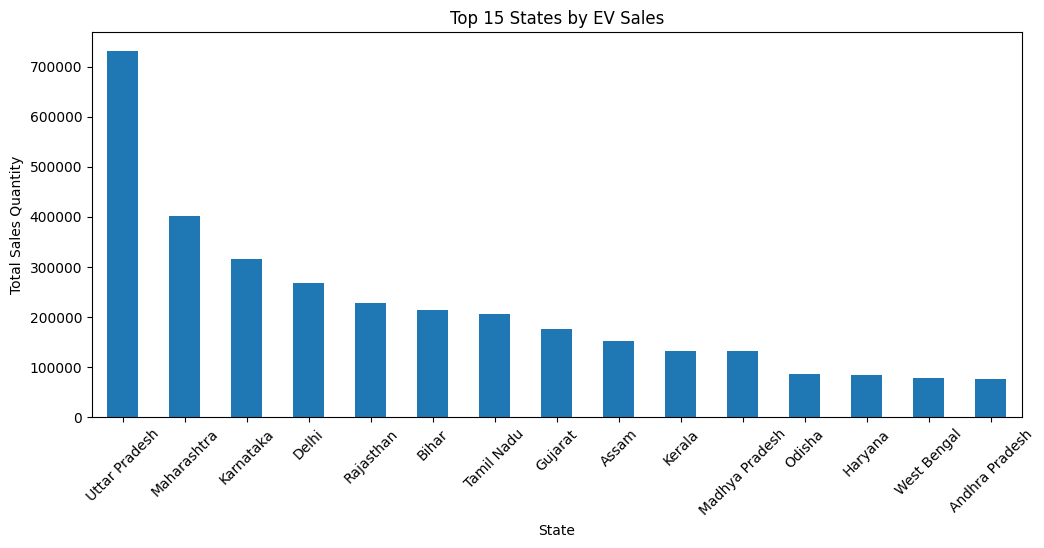

In [80]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(15)
state_sales.plot(kind='bar',figsize=(12,5))
plt.title('Top 15 States by EV Sales')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()


In [82]:
state_year_sales = df.groupby(['Year', 'State'])['EV_Sales_Quantity'].sum().reset_index()
pivot_sales = state_year_sales.pivot(index='State', columns='Year', values='EV_Sales_Quantity').fillna(0)
top_states = pivot_sales.sum(axis=1).sort_values(ascending=False).head(10).index
 


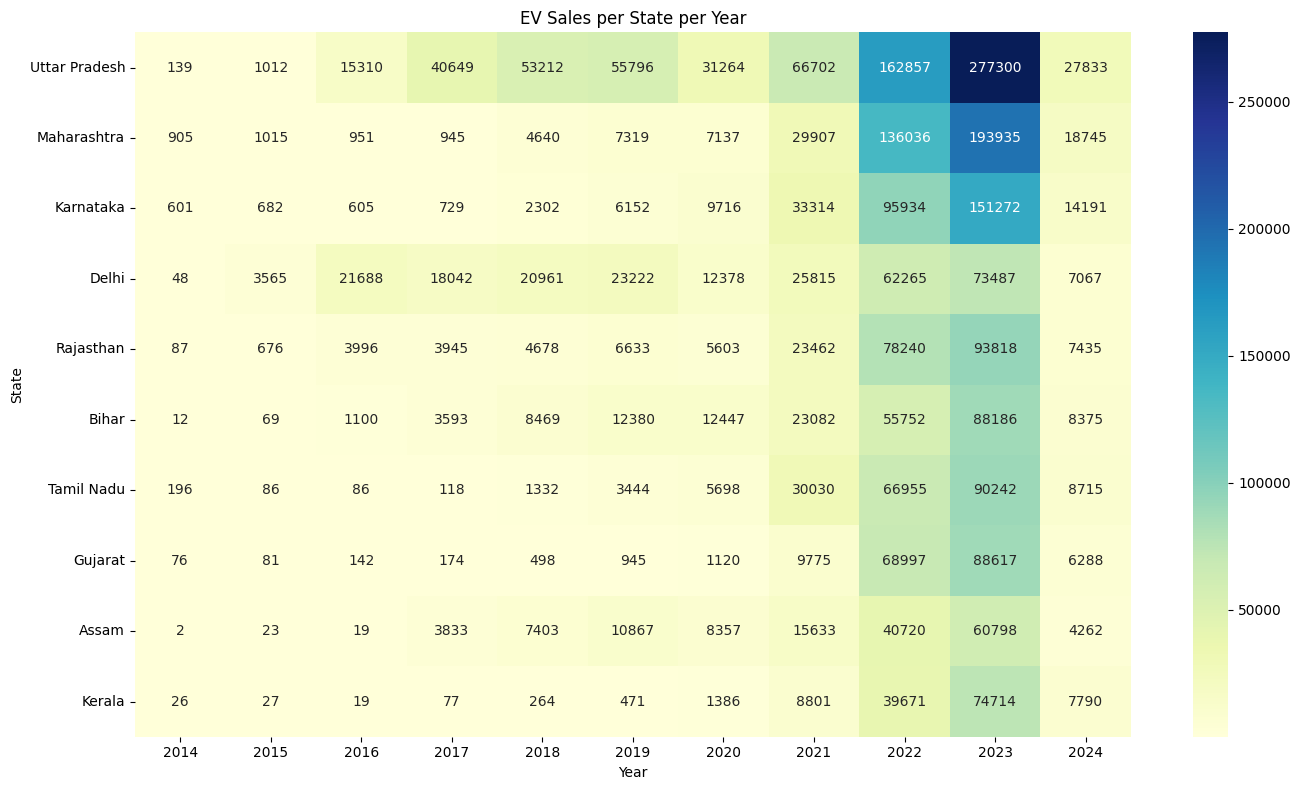

In [84]:
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_sales.loc[top_states], annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('EV Sales per State per Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

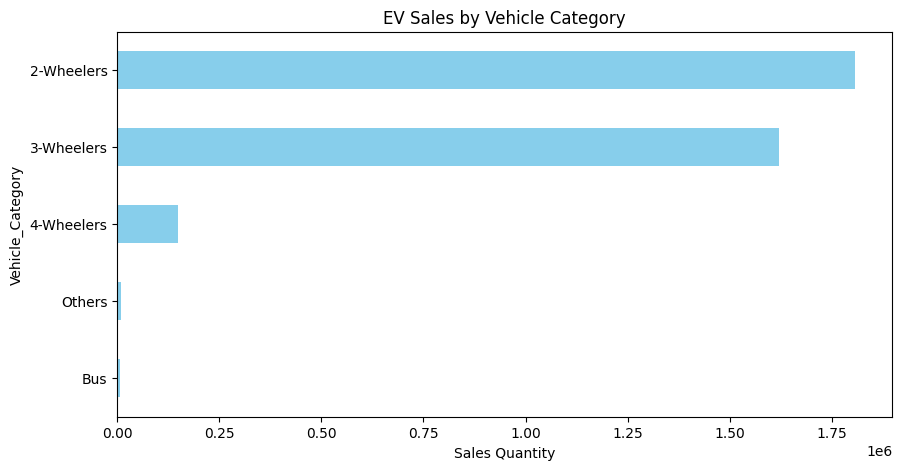

In [86]:
cat_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values()
cat_sales.plot(kind='barh', figsize=(10,5), color='skyblue')
plt.title('EV Sales by Vehicle Category')
plt.xlabel('Sales Quantity')
plt.show()


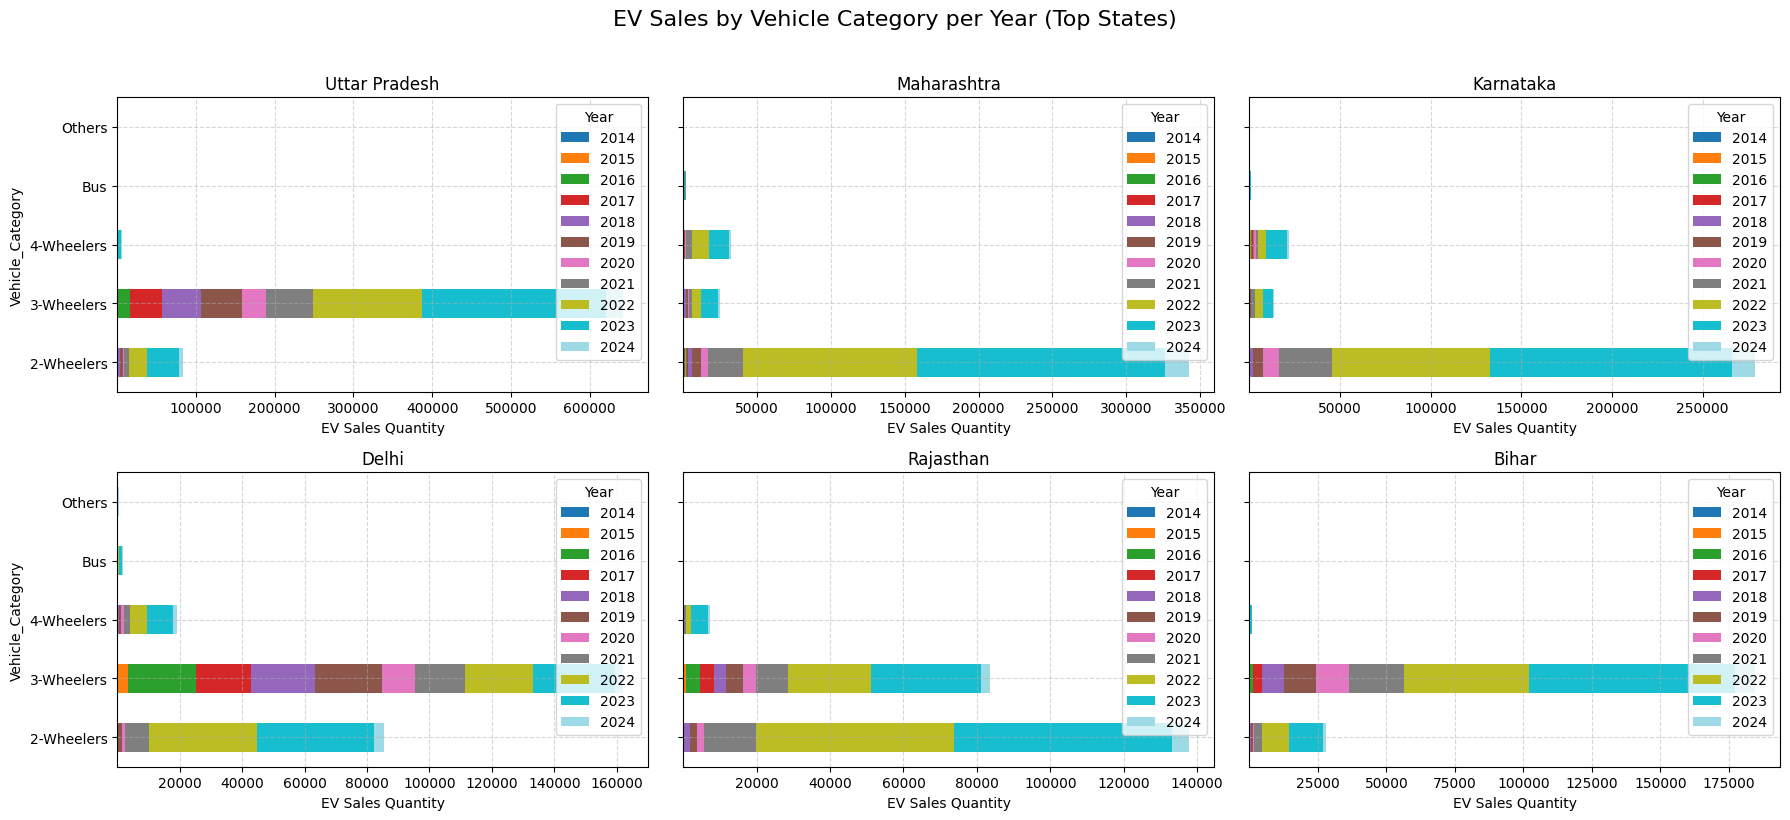

In [88]:
# Limit number of top states for clear layout
top_states = (
    df.groupby('State')['EV_Sales_Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(6)  # Change to 9 for 3x3 layout
    .index
)

# Filter data
df_top = df[df['State'].isin(top_states)]

# Group by State, Year, Category
grouped = (
    df_top.groupby(['State', 'Year', 'Vehicle_Category'])['EV_Sales_Quantity']
    .sum()
    .reset_index()
)

# Prepare subplot layout
states = top_states.tolist()
n_states = len(states)
cols = 3
rows = (n_states + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4), sharey=True)
axes = axes.flatten()

# Plot each state’s bar chart
for i, state in enumerate(states):
    ax = axes[i]
    state_data = grouped[grouped['State'] == state]

    pivot = state_data.pivot(index='Vehicle_Category', columns='Year', values='EV_Sales_Quantity').fillna(0)
    pivot.plot(kind='barh', ax=ax, stacked=True, colormap='tab20')

    ax.set_title(f'{state}')
    ax.set_xlabel('EV Sales Quantity')
    ax.grid(True, linestyle='--', alpha=0.5)

# Hide any extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('EV Sales by Vehicle Category per Year (Top States)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

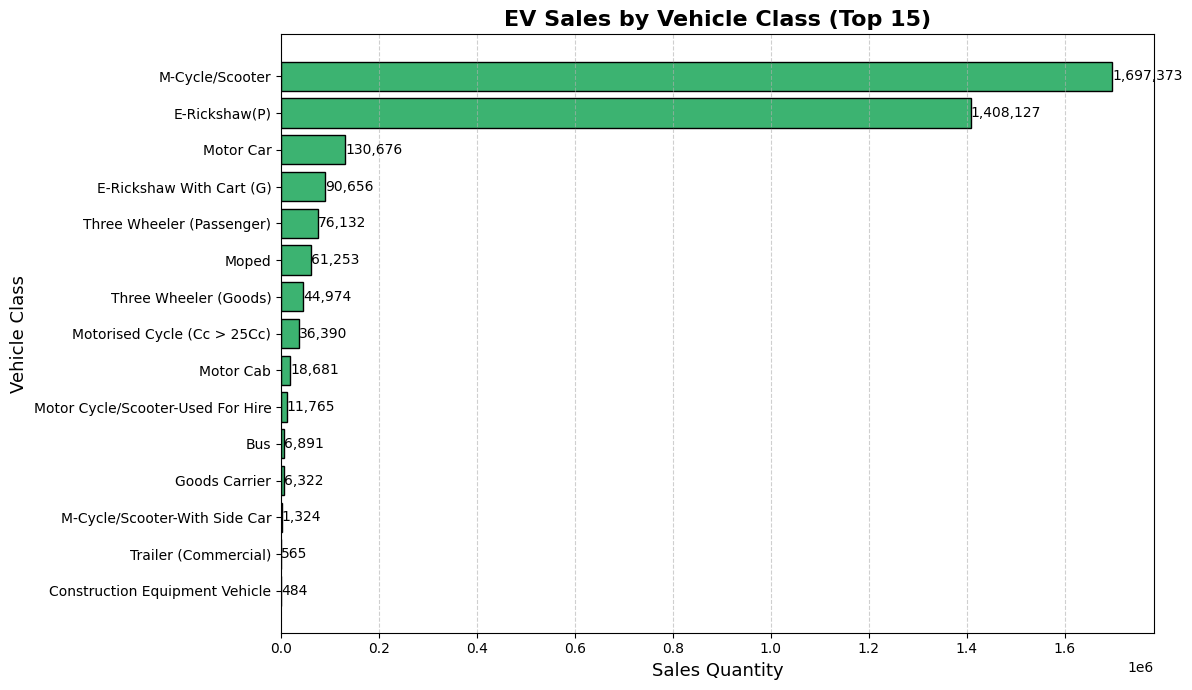

In [90]:
# Group and sort
class_sales = (
    df.groupby('Vehicle_Class_Grouped')['EV_Sales_Quantity']
    .sum()
    .sort_values(ascending=True)  # ascending for horizontal bar top-down
    .tail(15)  # Top 15 from bottom
)

# Plot
plt.figure(figsize=(12, 7))
bars = plt.barh(class_sales.index, class_sales.values, color='mediumseagreen', edgecolor='black')

# Title and axis labels
plt.title('EV Sales by Vehicle Class (Top 15)', fontsize=16, weight='bold')
plt.xlabel('Sales Quantity', fontsize=13)
plt.ylabel('Vehicle Class', fontsize=13)

# Grid for clarity
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=10)

# Tight layout
plt.tight_layout()
plt.show()


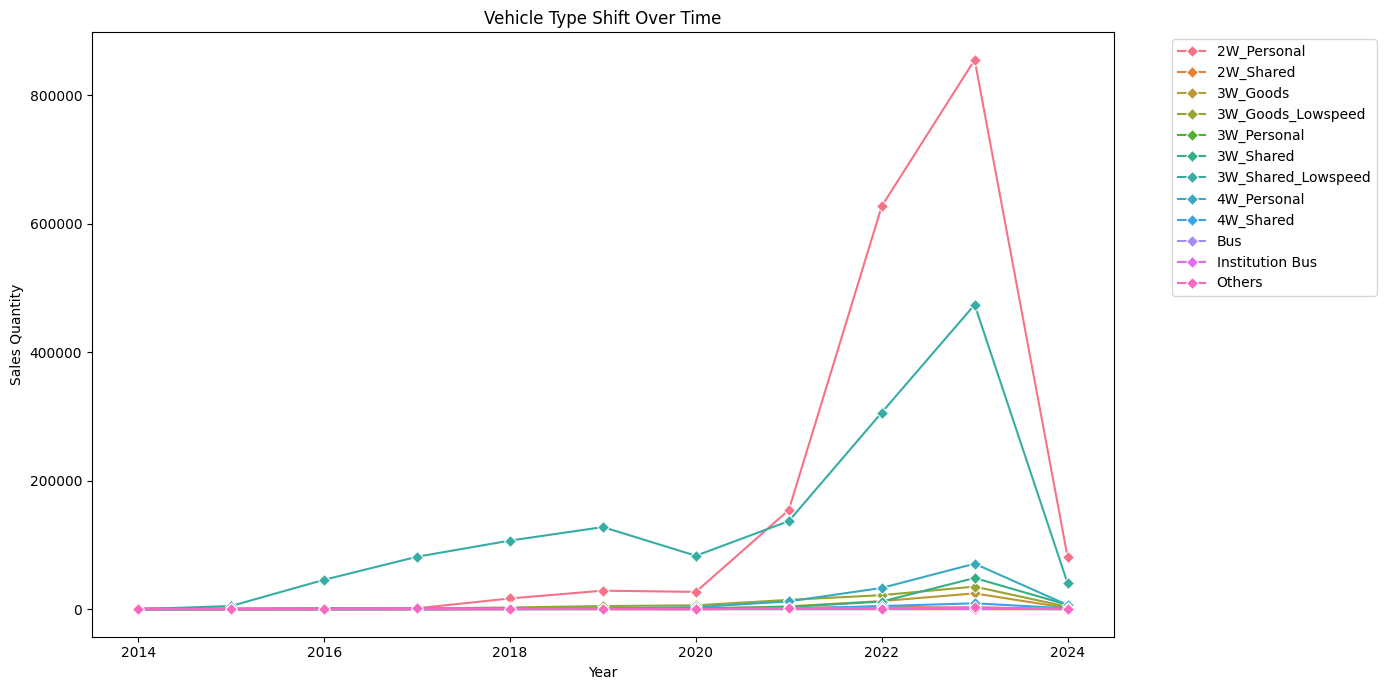

In [92]:
# Aggregate yearly sales by vehicle type
vehicle_type_trend = df.groupby(['Year', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(data=vehicle_type_trend, x='Year', y='EV_Sales_Quantity', hue='Vehicle_Type', marker='D')
plt.title('Vehicle Type Shift Over Time')
plt.ylabel('Sales Quantity')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df.head()

In [ ]:
df.tail(10)

In [96]:
df[(df['Year']==2024) & (df['EV_Sales_Quantity']>0)].shape[0]

250

In [98]:
df_2024 = df[df['Year'] == 2024]


C:\Users\MKProjects\AppData\Local\Temp\ipykernel_19580\3465703576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df_2024.groupby('Month_Name')['EV_Sales_Quantity'].sum()


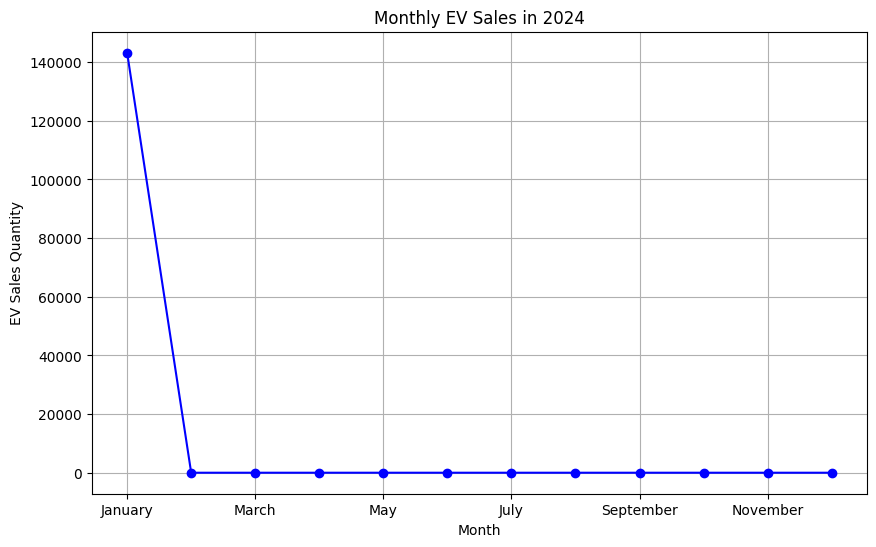

In [100]:
monthly_sales = df_2024.groupby('Month_Name')['EV_Sales_Quantity'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,6), color='blue')
plt.title('Monthly EV Sales in 2024')
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.grid(True)
plt.show()


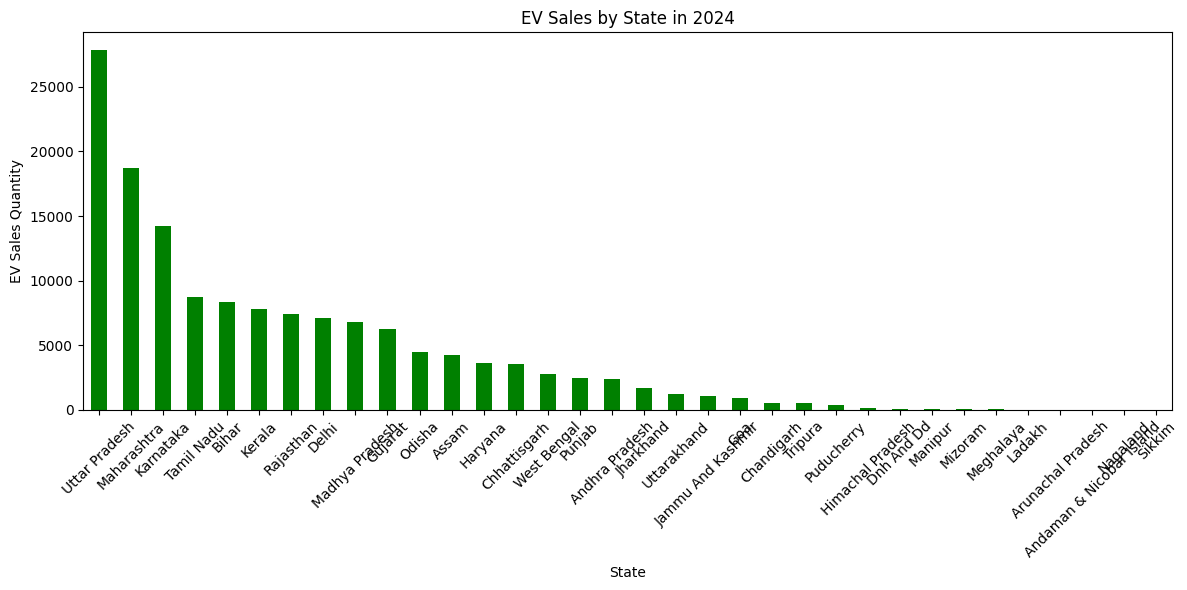

In [102]:
state_sales = df_2024.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

state_sales.plot(kind='bar', figsize=(12,6), color='green')
plt.title('EV Sales by State in 2024')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


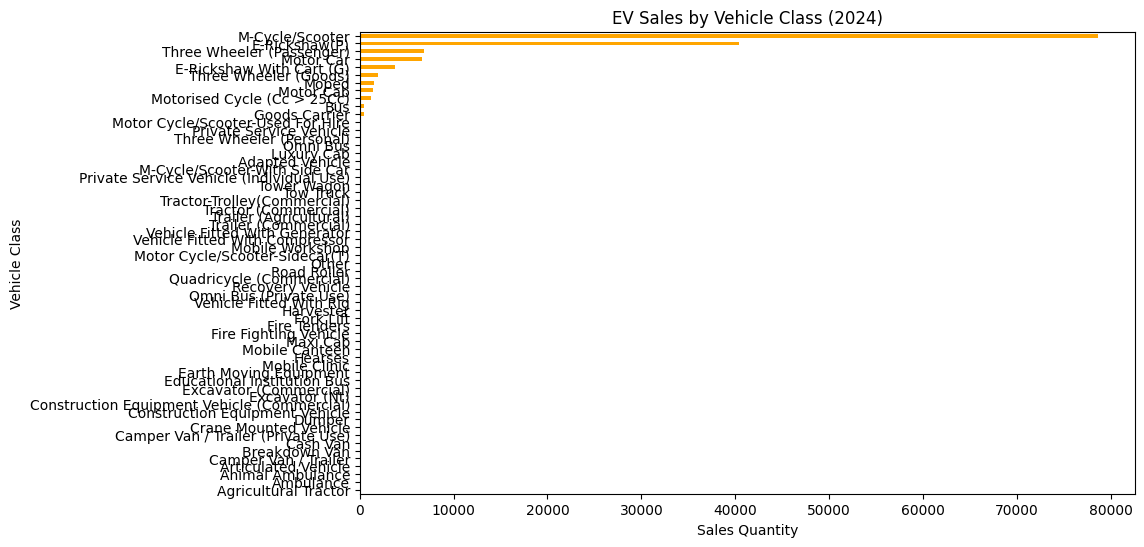

In [104]:
class_sales = df_2024.groupby('Vehicle_Class_Grouped')['EV_Sales_Quantity'].sum().sort_values()

class_sales.plot(kind='barh', figsize=(10,6), color='orange')
plt.title('EV Sales by Vehicle Class (2024)')
plt.xlabel('Sales Quantity')
plt.ylabel('Vehicle Class')
plt.show()


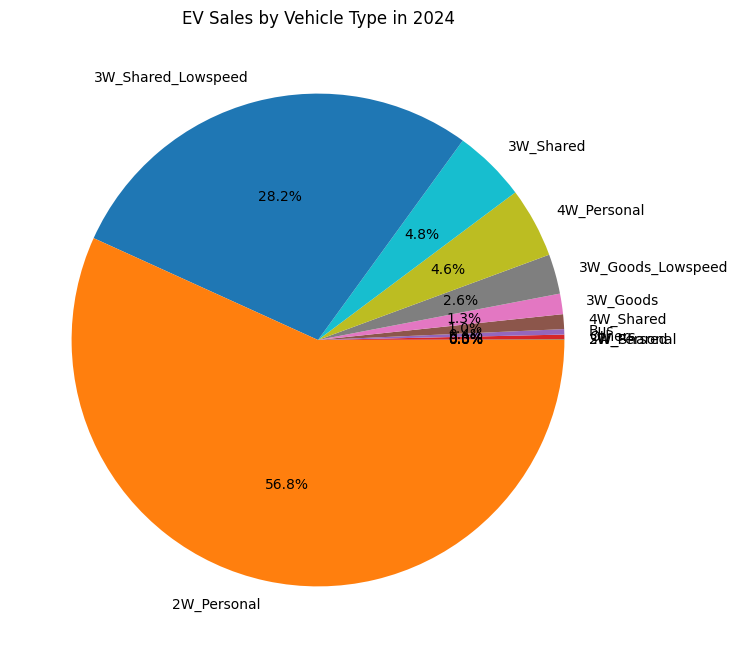

In [106]:
type_sales = df_2024.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values()

type_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('EV Sales by Vehicle Type in 2024')
plt.ylabel('')
plt.show()


C:\Users\MKProjects\AppData\Local\Temp\ipykernel_19580\3686558776.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_2024.pivot_table(index='State', columns='Month_Name', values='EV_Sales_Quantity', aggfunc='sum', fill_value=0)


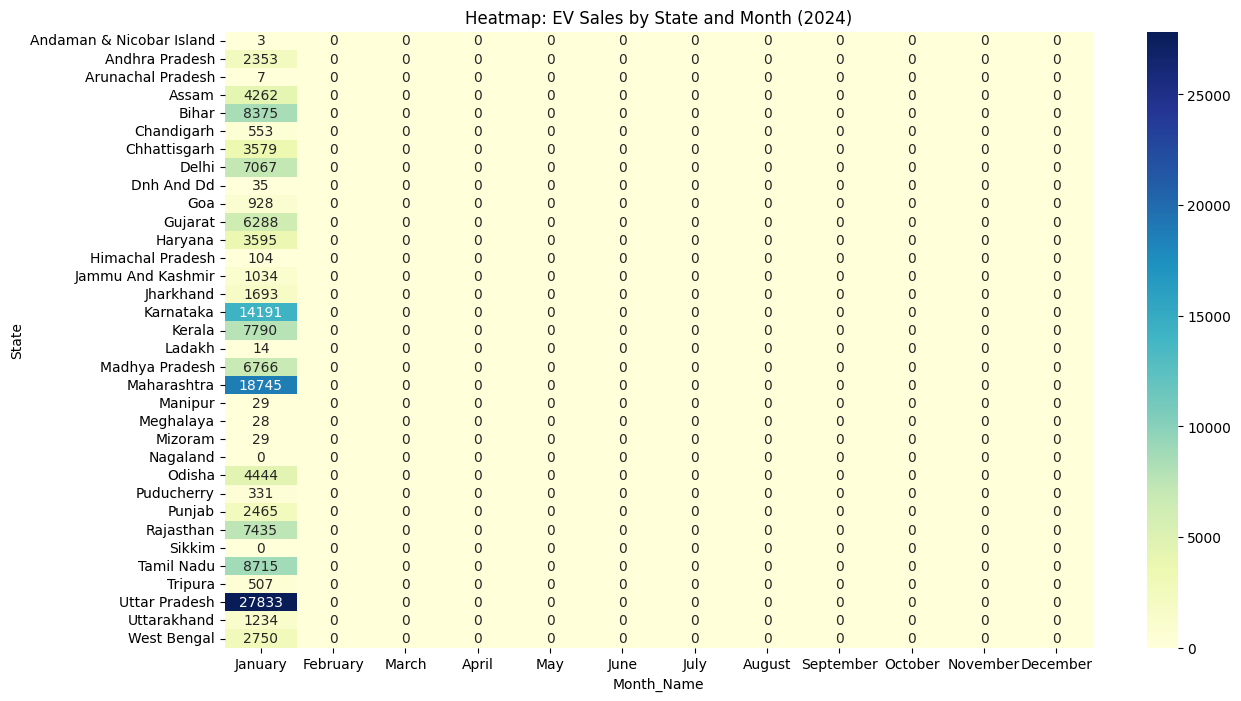

In [116]:
pivot_table = df_2024.pivot_table(index='State', columns='Month_Name', values='EV_Sales_Quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('DD')
plt.xlabel('Month_Name')
plt.ylabel('State')
plt.show()

In [112]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Vehicle_Class_Grouped
0,2014,January,2014-01-01,Andhra Pradesh,Adapted Vehicle,Others,Others,0.0,Adapted Vehicle
1,2014,January,2014-01-01,Andhra Pradesh,Agricultural Tractor,Others,Others,0.0,Agricultural Tractor
2,2014,January,2014-01-01,Andhra Pradesh,Ambulance,Others,Others,0.0,Ambulance
3,2014,January,2014-01-01,Andhra Pradesh,Articulated Vehicle,Others,Others,0.0,Articulated Vehicle
4,2014,January,2014-01-01,Andhra Pradesh,Bus,Bus,Bus,0.0,Bus
...,...,...,...,...,...,...,...,...,...
96840,2023,December,2023-12-01,Andaman & Nicobar Island,Motor Car,4-Wheelers,4W_Personal,1.0,Motor Car
96841,2023,December,2023-12-01,Andaman & Nicobar Island,Motor Cycle/Scooter-Used For Hire,2-Wheelers,2W_Shared,5.0,Motor Cycle/Scooter-Used For Hire
96842,2023,December,2023-12-01,Andaman & Nicobar Island,Omni Bus,Bus,Bus,0.0,Omni Bus
96843,2023,December,2023-12-01,Andaman & Nicobar Island,Three Wheeler (Goods),3-Wheelers,3W_Goods,0.0,Three Wheeler (Goods)


C:\Users\MKProjects\AppData\Local\Temp\ipykernel_19580\936766568.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df_2024.groupby('Month_Name')['EV_Sales_Quantity'].sum().sort_index()


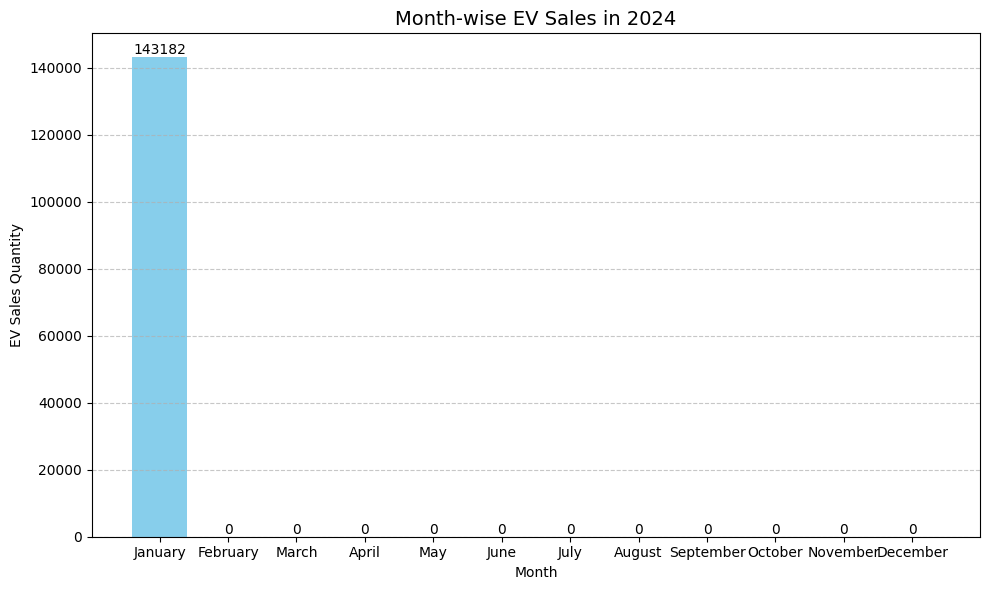

In [118]:
df_2024 = df[df['Year'] == 2024]

# Group by month and sum sales
monthly_sales = df_2024.groupby('Month_Name')['EV_Sales_Quantity'].sum().sort_index()

# Create the bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Set chart details
plt.title('Month-wise EV Sales in 2024', fontsize=14)
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.xticks(monthly_sales.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Droping year 2024 becasue there in no data after 1 Month (jan), it will creat a biase data and irregular data for that year,  

In [120]:
df=df[df['Year']!= 2024]

In [122]:
print(df['Year'].unique())


[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [124]:
df['Vehicle_Class'].unique()

array(['Adapted Vehicle', 'Agricultural Tractor', 'Ambulance',
       'Articulated Vehicle', 'Bus', 'Cash Van', 'Crane Mounted Vehicle',
       'Educational Institution Bus', 'Excavator (Commercial)',
       'Fork Lift', 'Goods Carrier', 'Harvester', 'Maxi Cab',
       'M-Cycle/Scooter', 'Motor Cab', 'Motor Car', 'Omni Bus',
       'Private Service Vehicle', 'Recovery Vehicle',
       'Three Wheeler (Passenger)', 'Tractor (Commercial)',
       'Trailer (Agricultural)', 'Trailer (Commercial)',
       'Trailer For Personal Use', 'Vehicle Fitted With Rig',
       'Camper Van / Trailer',
       'Construction Equipment Vehicle (Commercial)', 'Dumper',
       'Excavator (Nt)', 'Moped', 'Three Wheeler (Personal)',
       'Three Wheeler (Goods)', 'Earth Moving Equipment',
       'Motor Cycle/Scooter-Used For Hire',
       'Construction Equipment Vehicle', 'M-Cycle/Scooter-With Side Car',
       'Mobile Workshop', 'Omni Bus (Private Use)',
       'Vehicle Fitted With Compressor',
       'Camper

## Model traning

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [128]:
features = ['Year', 'Month_Name', 'State', 'Vehicle_Category', 'Vehicle_Class_Grouped', 'Vehicle_Type']
target = 'EV_Sales_Quantity'

X = df[features]
y = df[target]

In [130]:
cat_cols = ['Month_Name', 'State', 'Vehicle_Category', 'Vehicle_Class_Grouped','Vehicle_Type']

preprocessor = ColumnTransformer(
    transformers = [
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [134]:
y_pred

array([-17.83870986,   9.92886708,  -6.87829957, ..., -52.91668733,
       -66.85628792,  36.15372752])

In [136]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [138]:
print(f"✅ Mean Absolute Error: {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")

✅ Mean Absolute Error: 83.94
✅ R² Score: 0.10


In [140]:
from sklearn.ensemble import RandomForestRegressor

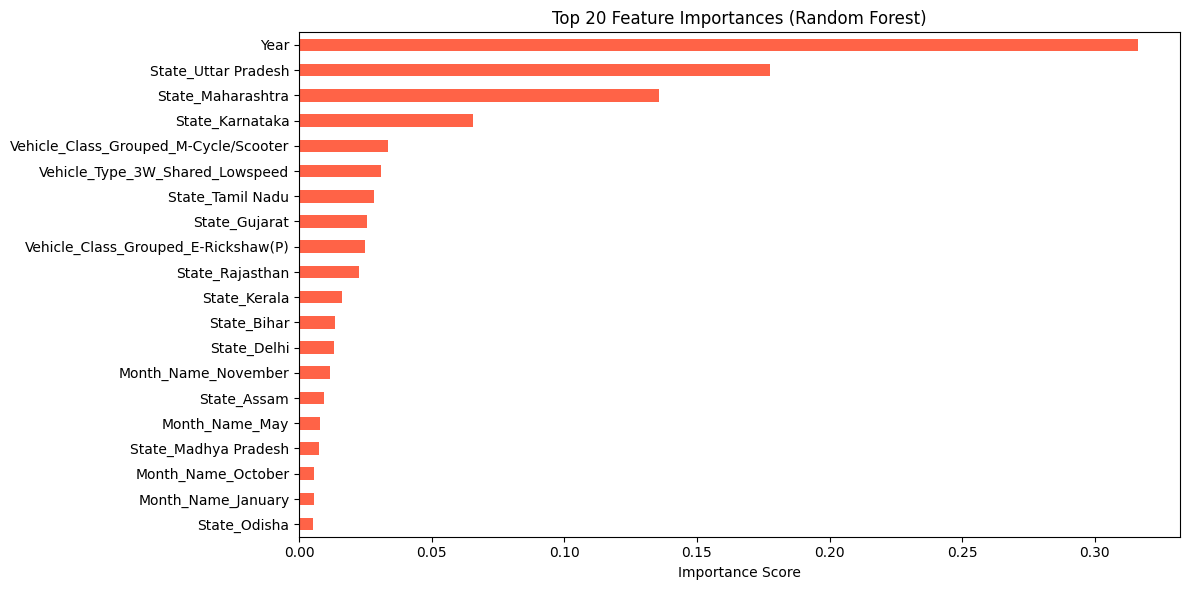

In [145]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

# Define again if not in scope
categorical_features = ['Month_Name', 'State', 'Vehicle_Category', 'Vehicle_Class_Grouped', 'Vehicle_Type']

# Access the fitted OneHotEncoder
ohe = rf_pipeline.named_steps['preprocess'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_features)
all_features = list(ohe_features) + ['Year']

# Get feature importances from the Random Forest model
importances = rf_pipeline.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
feat_imp.head(20).plot(kind='barh', color='tomato')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()



In [143]:
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_lr = pipeline.predict(X_test)

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Linear Regression Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [150]:
print("🔍 Model Evaluation Results:\n")

print("📌 Random Forest Regressor:")
print(f"MAE  : {mae_rf:.2f}")
print(f"MSE  : {mse_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.3f}")

print("\n📌 Linear Regression:")
print(f"MAE  : {mae_lr:.2f}")
print(f"MSE  : {mse_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"R²   : {r2_lr:.3f}")


🔍 Model Evaluation Results:

📌 Random Forest Regressor:
MAE  : 11.16
MSE  : 14211.94
RMSE : 119.21
R²   : 0.908

📌 Linear Regression:
MAE  : 83.94
MSE  : 138433.46
RMSE : 372.07
R²   : 0.099


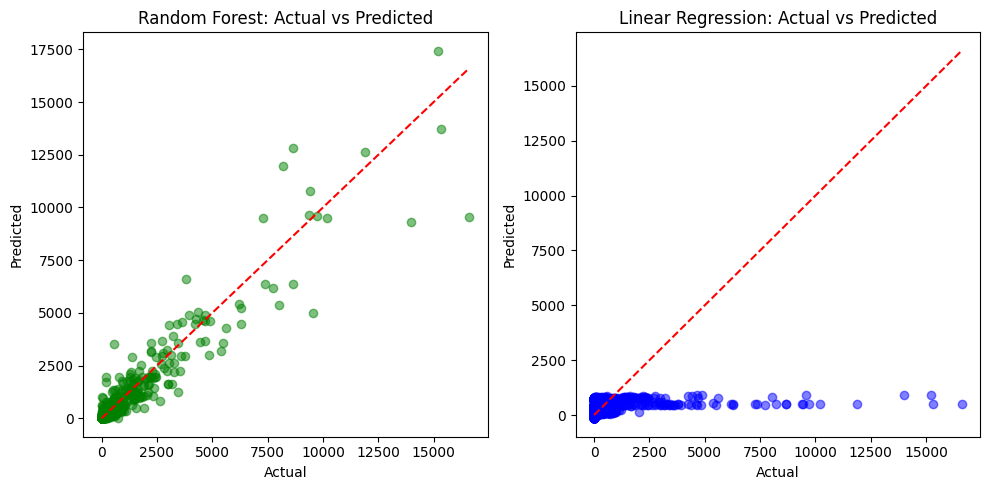

In [161]:
plt.figure(figsize=(10,5))

# Scatter plot for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


## Conclusion
The machine learning model developed in this study aids in understanding the key factors influencing Electric Vehicle (EV) sales across different states and provides a reliable method for predicting future sales based on historical data. By applying feature importance analysis from the Random Forest model, we gain valuable insights into which variables—such as State, Vehicle Category, and Vehicle Type—have the greatest impact on EV sales.

In comparing the performance of two regression algorithms—Random Forest Regressor and Linear Regression—the Random Forest model significantly outperformed the linear model across all evaluation metrics:

The Random Forest Regressor achieved a high R² score of 0.907, indicating that it explains over 90% of the variance in EV sales data. It also maintained low error values (MAE: 11.19, RMSE: 119.26), making it a highly accurate and robust predictor.

In contrast, Linear Regression showed poor performance, with an R² score of only 0.099, meaning it could explain less than 10% of the variance. The high MAE (83.94) and RMSE (372.07) further confirm its inability to capture complex, non-linear relationships in the data.

Overall, the Random Forest model is clearly more suitable for this task, as it effectively handles the categorical variables and captures the underlying patterns in EV sales data. This model can be a valuable tool for policymakers and manufacturers in forecasting demand and making data-driven decisions in the electric vehicle sector.

In [154]:
from sklearn.model_selection import cross_val_score

In [158]:
scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='r2', n_jobs=-1)
print("Cross-validated R² scores:", scores)
print("Average CV R²:", scores.mean())

Cross-validated R² scores: [0.85379518 0.90209714 0.92161076 0.9466181  0.88673825]
Average CV R²: 0.9021718890082884


Cross-validation results confirm the robustness of the Random Forest model, achieving an average R² score of 0.902 across 5 folds. The individual fold scores range between 0.854 and 0.947, indicating stable performance and strong generalization capability across different data subsets. This further validates the model's effectiveness in predicting electric vehicle sales and understanding underlying trends across regions and time periods.

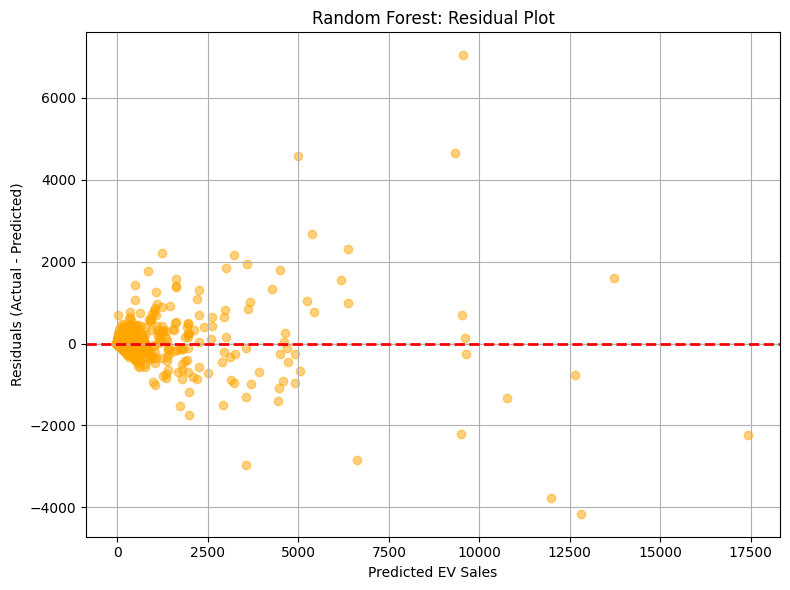

In [165]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted EV Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Random Forest: Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()
